In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torchvision import datasets

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/andrea/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:644: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
dataset = datasets.ImageFolder(
    root='mini-ImageNet'
)
with open('mini-ImageNet/imagenet_class_index.json') as f:
    class_index = json.load(f)

folder_to_class = {value[0]: value[1] for key, value in class_index.items()}
all_classes = [folder_to_class[folder].lower().replace(" ", "_") for folder in dataset.classes]

In [3]:
pred_labels = np.load('results/pred_labels.npy')
true_labels = np.load('results/true_labels.npy')
pred_labels = np.char.replace(np.char.lower(pred_labels), " ", "_")
true_labels = np.char.replace(np.char.lower(true_labels), " ", "_")

In [4]:
class_to_index = {class_name: index for index, class_name in enumerate(all_classes)}
index_pred_labels = np.array([class_to_index[label] for label in pred_labels])
index_true_labels = np.array([class_to_index[label] for label in true_labels])

confusion_mat = confusion_matrix(index_true_labels, index_pred_labels)

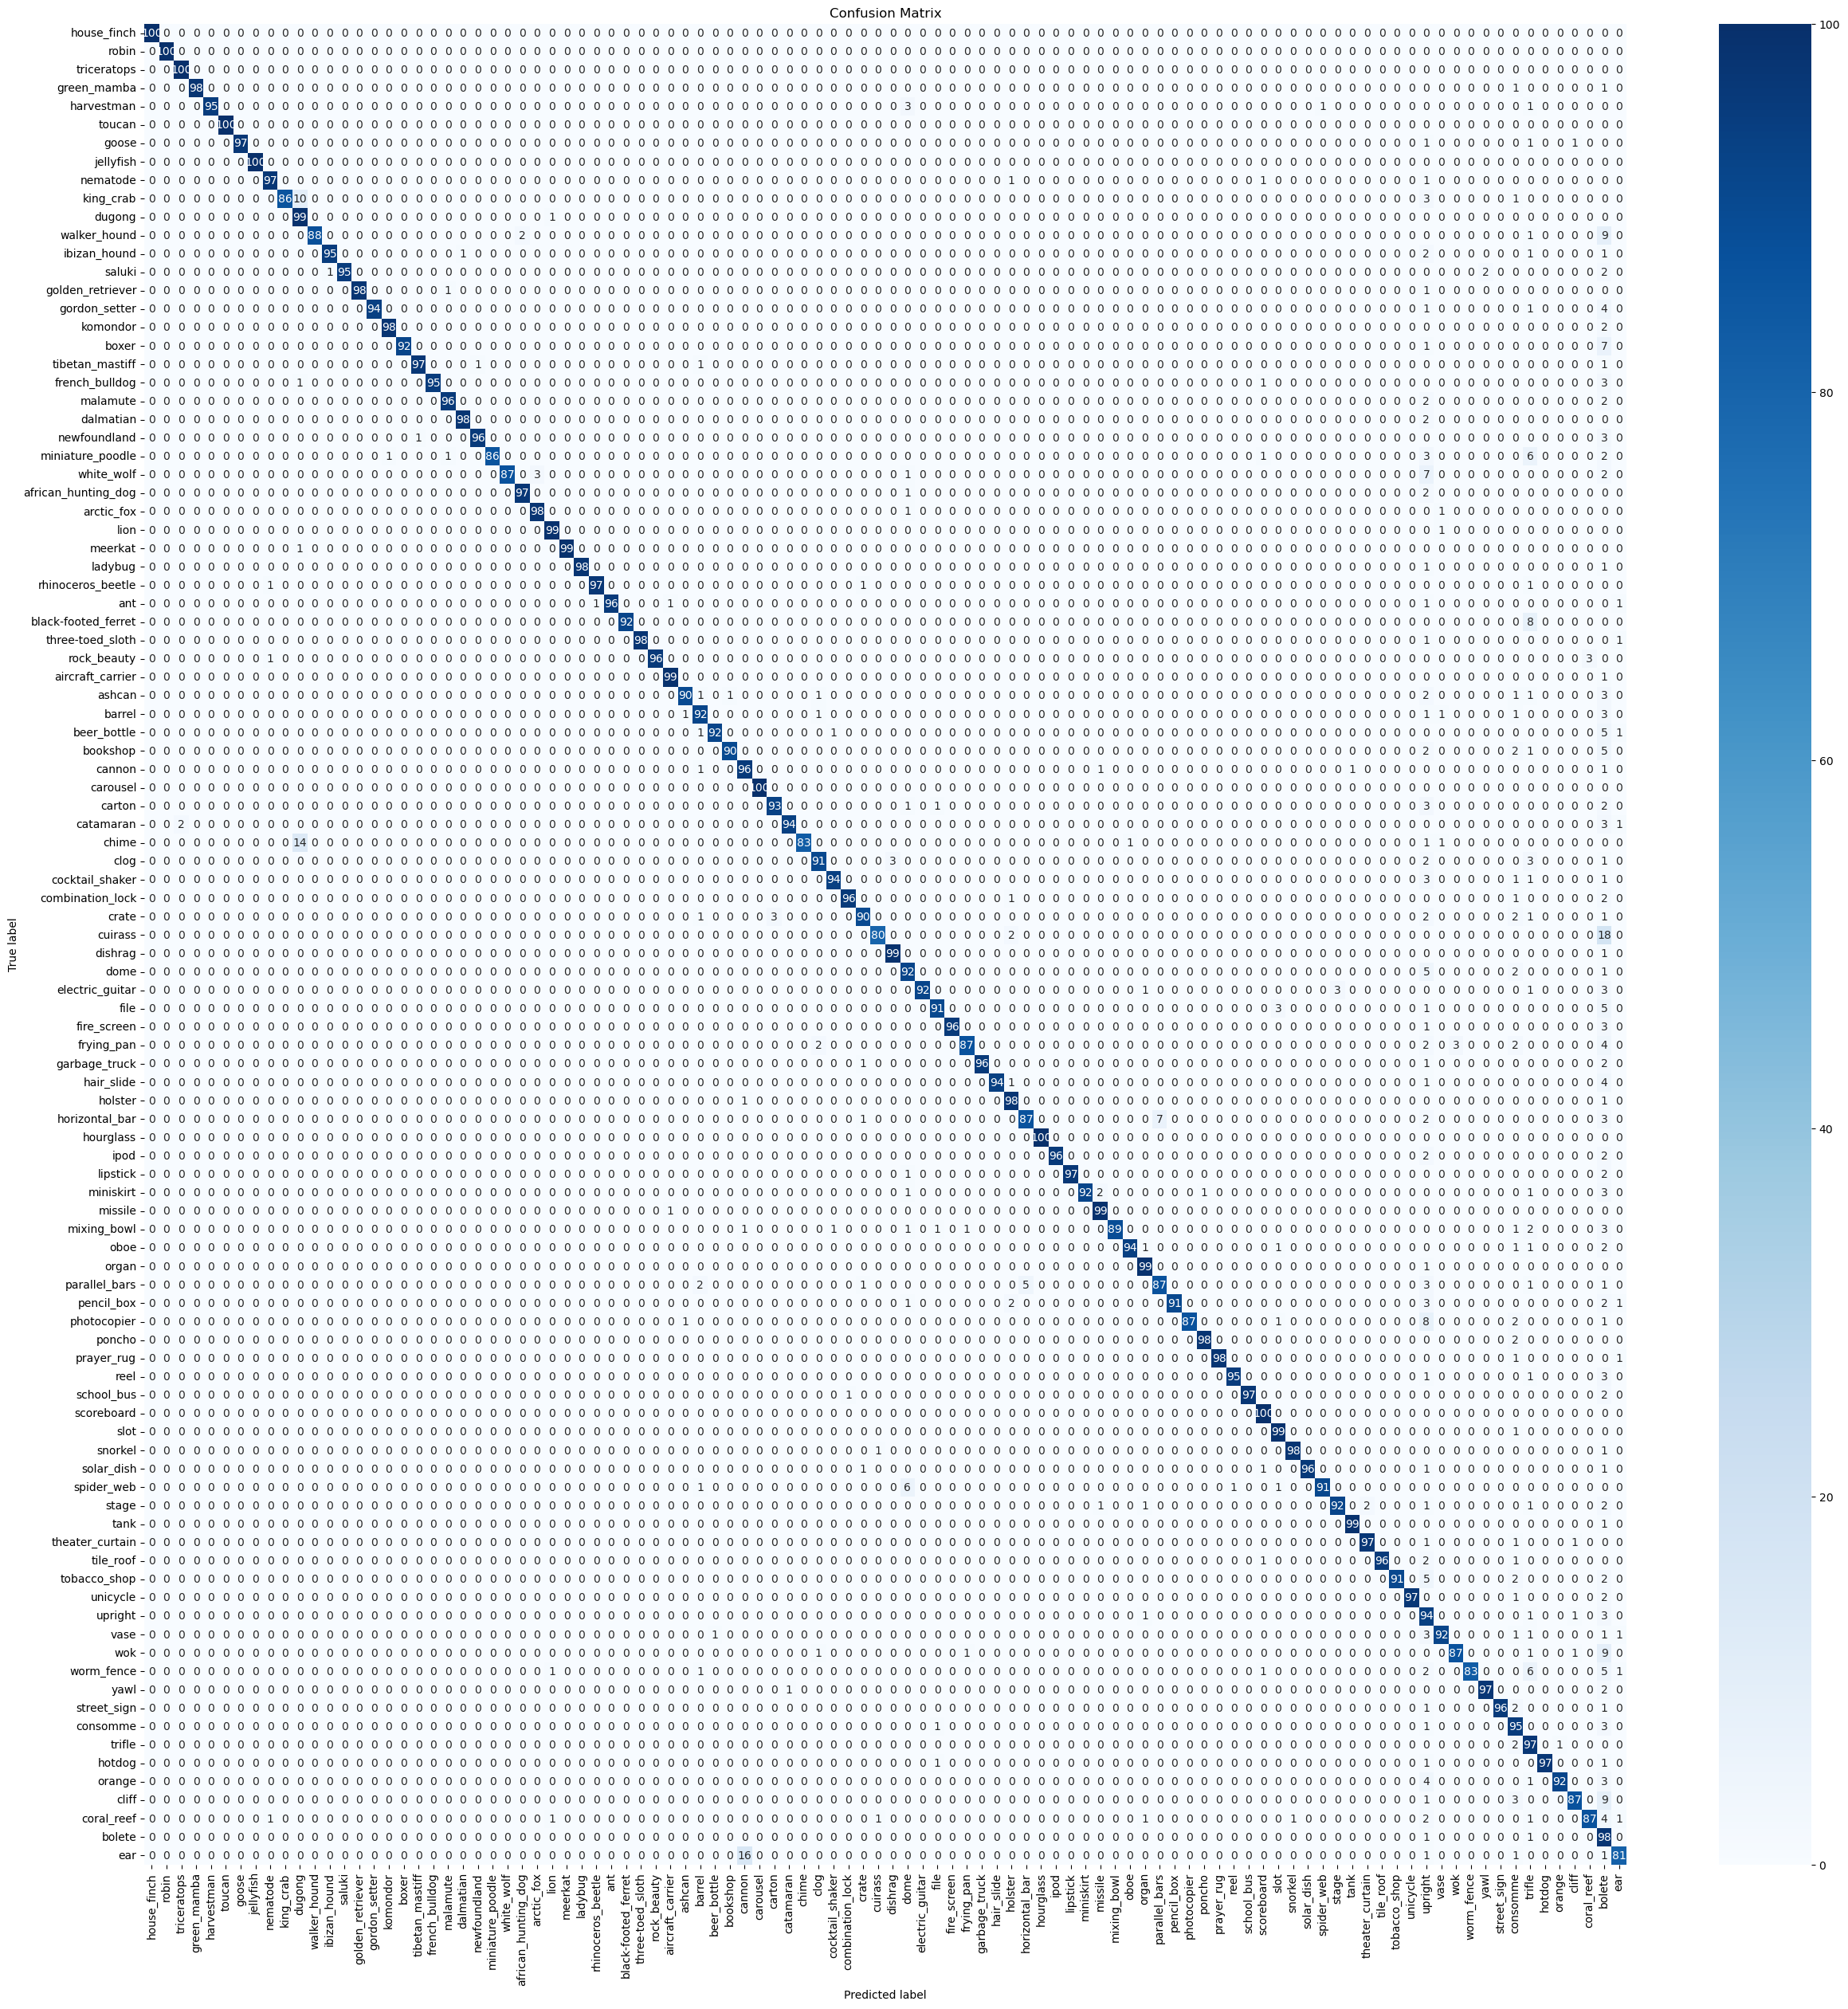

In [5]:
# confusion_mat = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=all_classes, yticklabels=all_classes)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('results/confusion_matrix.png')
plt.show()

In [6]:
classification_report = classification_report(true_labels, pred_labels, target_names=all_classes)

with open("results/resnet50_100w.txt", "w") as f:
    print(classification_report, file=f)

print(classification_report)

                     precision    recall  f1-score   support

        house_finch       0.98      0.97      0.97       100
              robin       0.98      0.99      0.99       100
        triceratops       1.00      0.96      0.98       100
        green_mamba       0.97      0.98      0.98       100
         harvestman       0.98      0.90      0.94       100
             toucan       0.91      0.92      0.92       100
              goose       0.99      0.92      0.95       100
          jellyfish       1.00      0.92      0.96       100
           nematode       0.35      0.98      0.51       100
          king_crab       0.99      0.90      0.94       100
             dugong       1.00      0.92      0.96       100
       walker_hound       0.84      0.96      0.90       100
       ibizan_hound       1.00      1.00      1.00       100
             saluki       0.97      0.93      0.95       100
   golden_retriever       0.99      0.94      0.96       100
      gordon_setter    